## [ 자료 구조 확인 ]

In [20]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])



*   train_data(test_data) : 단어 인덱스들로 이루어진 여러개의 리스트로 구성되어 있고, 각 리스트의 길이가 모두 다른 것을 알 수 있다.

- train_labels(test_labels) : (0~45)사이의 정수로 이루어진 리스트로 이루어져 있다.

＊label의 (0~45)사이의 정수 : 해당 뉴스가 분류된 토픽의 인덱스





## [ 데이터 준비 ]

In [39]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):          #enumerate: 리스트의 인덱스와 값을 나열해준다.(i:인덱스, sequence:값)
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [40]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [63]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)



*   원-핫 인코딩(def to_one_hot): 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터로 만들어준다.



## [ 모델 생성 ]



*   (이전의 layer)

    layers.Dense(16, activation='relu', input_shape=(10000,)))




*   각 뉴스들은 46개의 토픽(클래스)로 분류되어야 하는데, 16차원 공간은 제약이 발생할 수 있다.

  → 이전의 layer와 달리 64차원 공간을 이용하여 모델을 생성할 것이다.





In [41]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



*   마지막 layer : 46개의 클래스로 분류해야 하므로, 각 입력 샘플에 대해서 46 차원의 벡터를 출력한다.
*   sofrmax : 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력하고, 모두 더하면 1이 된다.



In [42]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])



*   categorical_crossentropy : 두 확률 분포 사이의 거리를 측정한다.

→ 네트워크가 출력한 확률 분포와 실제 레이블의 분포 사이의 거리를 최소화하면, 실제 레이블에 가장 가까운 출력을 내도록 훈련된다.


## [ 훈련 검증 ]

In [69]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [26]:
history=model.fit(partial_x_train, partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/step - loss: 2.4916 - acc: 0.5392 - val_loss: 1.6633 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.3899 - acc: 0.7012 - val_loss: 1.2946 - val_acc: 0.6940
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.0574 - acc: 0.7749 - val_loss: 1.1237 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8325 - acc: 0.8230 - val_loss: 1.0165 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.6605 - acc: 0.8593 - val_loss: 0.9826 - val_acc: 0.7780
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5239 - acc: 0.8925 - val_loss: 0.9093 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4183 - acc: 0.9134 - val_loss: 0.8993 - val_acc: 0.8110


In [27]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

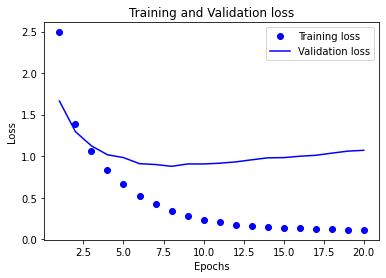

In [29]:
import matplotlib.pyplot as plt

loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

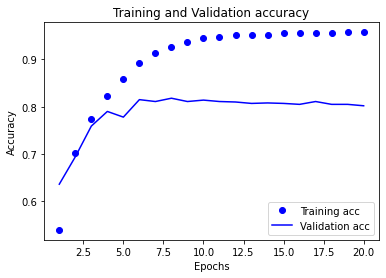

In [30]:
plt.clf()

acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### → 그래프 해석



*   아홉번째 epoch 이후부터, validation loss는 다시 증가하고 accuracy는 감소하기 시작한다.
*   즉, 아홉번째 epoch 이후부터 과대적합이 시작되는 것이다.
- 따라서, 아홉 번까지만 epoch 반복을 통해 모델을 훈련하면 된다.


In [43]:
model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 133us/step - loss: 2.6864 - acc: 0.5298 - val_loss: 1.7667 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 125us/step - loss: 1.4394 - acc: 0.7108 - val_loss: 1.3224 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.0620 - acc: 0.7741 - val_loss: 1.1362 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.8307 - acc: 0.8256 - val_loss: 1.0329 - val_acc: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.6595 - acc: 0.8619 - val_loss: 0.9743 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.5302 - acc: 0.8874 - val_loss: 0.9621 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.4303 - acc: 0.9124 - val_loss: 0.9043 - val_acc: 0.8090
Epoch 8

In [44]:
test_loss, test_acc=model.evaluate(x_test, one_hot_test_labels)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

2246/2246 [==============================] - 0s 111us/step
test_loss:  1.0045661801009547
test_acc:  0.7902938723564148


In [46]:
predictions=model.predict(x_test)

In [47]:
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3



( 해석 )
*   model.predict( )는 46개의 토픽에 대한 확률 분포를 반환해준다.
*   46개의 토픽에 대한 확률 분포의 총 합은 1이 된다.
- 46개의 확률 중에서 가장 큰 값을 나타내는 토픽이 예측 클래스가 된다.(첫번째 뉴스는 3으로 분류됨)



---




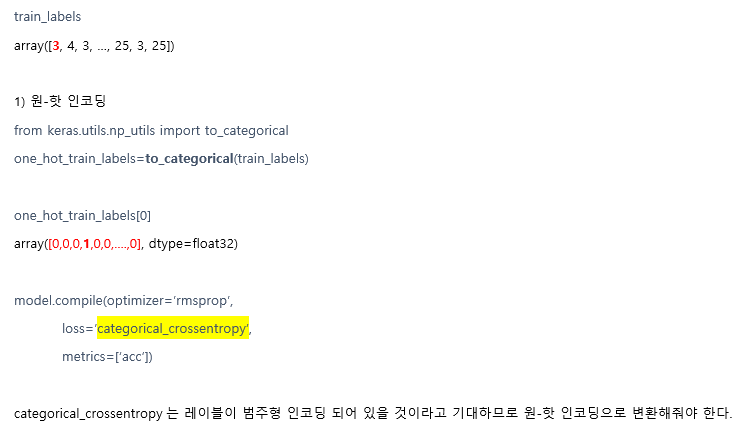

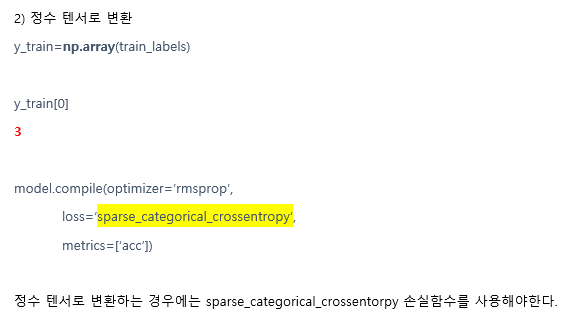